In [17]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

def rmse_function_prophet(df):
    df['ds'] = pd.to_datetime(df['ds'])
    df['hour'] = df['ds'].dt.hour
    results = []
    for hour, group in df.groupby('hour'):
        rmse_yhat = np.sqrt(np.mean((group['y'] - group['yhat'])**2))
        rmse_adjusted = np.sqrt(np.mean((group['y'] - group['adjusted_y'])**2))
        results.append({
            'hour': hour,
            'RMSE_yhat': rmse_yhat,
            'RMSE_adjusted_y': rmse_adjusted
        })
    return pd.DataFrame(results)

def rmse_function_rnn(df):
    df['day'] = pd.to_datetime(df['day'])
    results = []
    for hour, group in df.groupby('hour'):
        rmse_yhat = np.sqrt(np.mean((group['y'] - group['y_hat'])**2))
        results.append({
            'hour': hour,
            'RMSE_yhat': rmse_yhat,
        })
    return pd.DataFrame(results)

## AEP results

In [18]:
out_dir = 'AEP_results'

In [19]:
result1 = pd.read_csv('experiment_results/' + out_dir + '/results_prophet.csv')
rmse_rnn1 = rmse_function_prophet(result1)

result2 = pd.read_csv('experiment_results/' + out_dir + '/results_prophet_dwy.csv')
rmse_rnn2 = rmse_function_prophet(result2)

result3 = pd.read_csv('experiment_results/' + out_dir + '/results_simple.csv')
rmse_rnn3 = rmse_function_rnn(result3)

result4 = pd.read_csv('experiment_results/' + out_dir + '/results_attention.csv')
rmse_rnn4 = rmse_function_rnn(result4)

result5 = pd.read_csv('experiment_results/' + out_dir + '/results_fourier.csv')
rmse_rnn5 = rmse_function_rnn(result5)

result6 = pd.read_csv('experiment_results/' + out_dir + '/results_fourier_dim16.csv')
rmse_rnn6 = rmse_function_rnn(result6)

result7 = pd.read_csv('experiment_results/' + out_dir + '/results_fourier_dim64.csv')
rmse_rnn7 = rmse_function_rnn(result7)

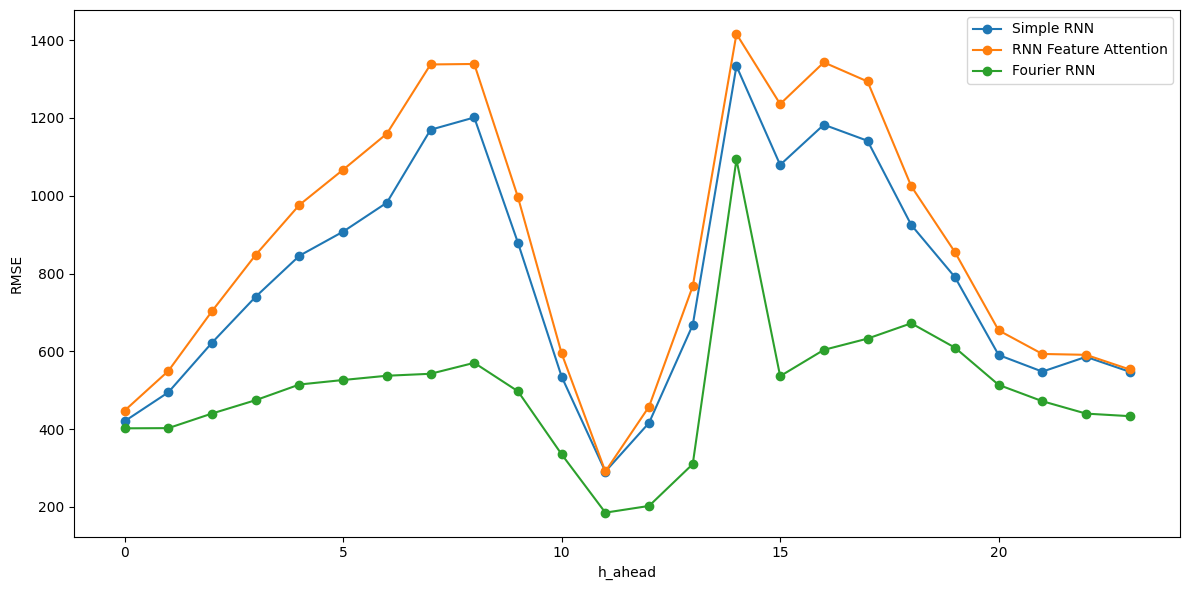

In [20]:

plt.figure(figsize=(12, 6))
plt.plot(rmse_rnn3['hour'], rmse_rnn3['RMSE_yhat'], label='Simple RNN', marker='o')
plt.plot(rmse_rnn4['hour'], rmse_rnn4['RMSE_yhat'], label='RNN Feature Attention', marker='o')
plt.plot(rmse_rnn5['hour'], rmse_rnn5['RMSE_yhat'], label='Fourier RNN', marker='o')
plt.xlabel('h_ahead')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.savefig('experiment_results/' + out_dir + '/rmse_rnn_aep.png')
plt.show()

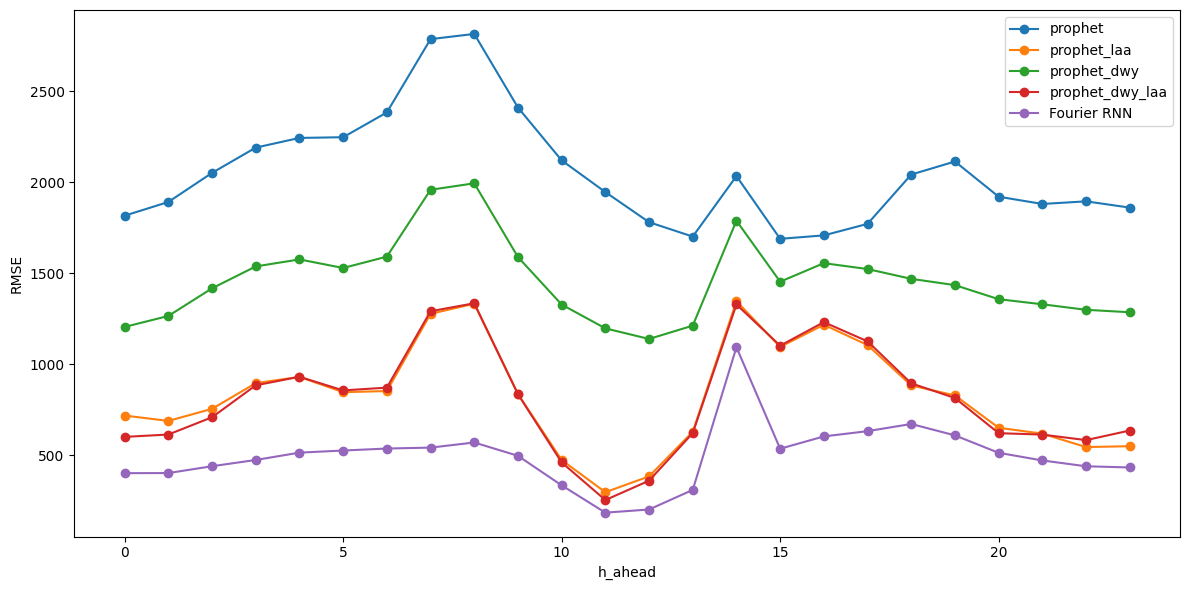

In [5]:

plt.figure(figsize=(12, 6))
plt.plot(rmse_rnn1['hour'], rmse_rnn1['RMSE_yhat'], label='prophet', marker='o')
plt.plot(rmse_rnn1['hour'], rmse_rnn1['RMSE_adjusted_y'], label='prophet_laa', marker='o')
plt.plot(rmse_rnn2['hour'], rmse_rnn2['RMSE_yhat'], label='prophet_dwy', marker='o')
plt.plot(rmse_rnn2['hour'], rmse_rnn2['RMSE_adjusted_y'], label='prophet_dwy_laa', marker='o')
plt.plot(rmse_rnn5['hour'], rmse_rnn5['RMSE_yhat'], label='Fourier RNN', marker='o')
plt.xlabel('h_ahead')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.savefig('experiment_results/' + out_dir + '/rmse_prophet_aep.png')
plt.show()

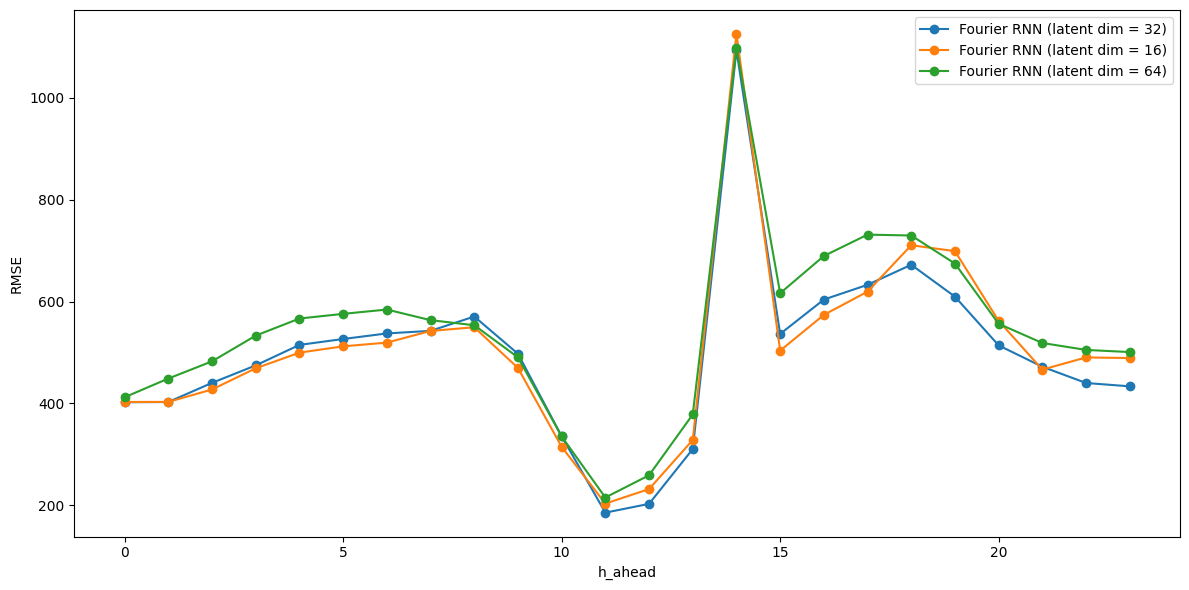

In [21]:

plt.figure(figsize=(12, 6))
plt.plot(rmse_rnn5['hour'], rmse_rnn5['RMSE_yhat'], label='Fourier RNN (latent dim = 32)', marker='o')
plt.plot(rmse_rnn6['hour'], rmse_rnn6['RMSE_yhat'], label='Fourier RNN (latent dim = 16)', marker='o')
plt.plot(rmse_rnn7['hour'], rmse_rnn7['RMSE_yhat'], label='Fourier RNN (latent dim = 64)', marker='o')
plt.xlabel('h_ahead')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.savefig('experiment_results/' + out_dir + '/rmse_latent_aep.png')
plt.show()

## Comed results

In [4]:
out_dir = 'Comed_results'

In [5]:
result1 = pd.read_csv('experiment_results/' + out_dir + '/results_prophet.csv')
rmse_rnn1 = rmse_function_prophet(result1)

result2 = pd.read_csv('experiment_results/' + out_dir + '/results_prophet_dwy.csv')
rmse_rnn2 = rmse_function_prophet(result2)

result3 = pd.read_csv('experiment_results/' + out_dir + '/results_simple.csv')
rmse_rnn3 = rmse_function_rnn(result3)

result4 = pd.read_csv('experiment_results/' + out_dir + '/results_attention.csv')
rmse_rnn4 = rmse_function_rnn(result4)

result5 = pd.read_csv('experiment_results/' + out_dir + '/results_fourier.csv')
rmse_rnn5 = rmse_function_rnn(result5)

result6 = pd.read_csv('experiment_results/' + out_dir + '/results_fourier_dim16.csv')
rmse_rnn6 = rmse_function_rnn(result6)

result7 = pd.read_csv('experiment_results/' + out_dir + '/results_fourier_dim64.csv')
rmse_rnn7 = rmse_function_rnn(result7)

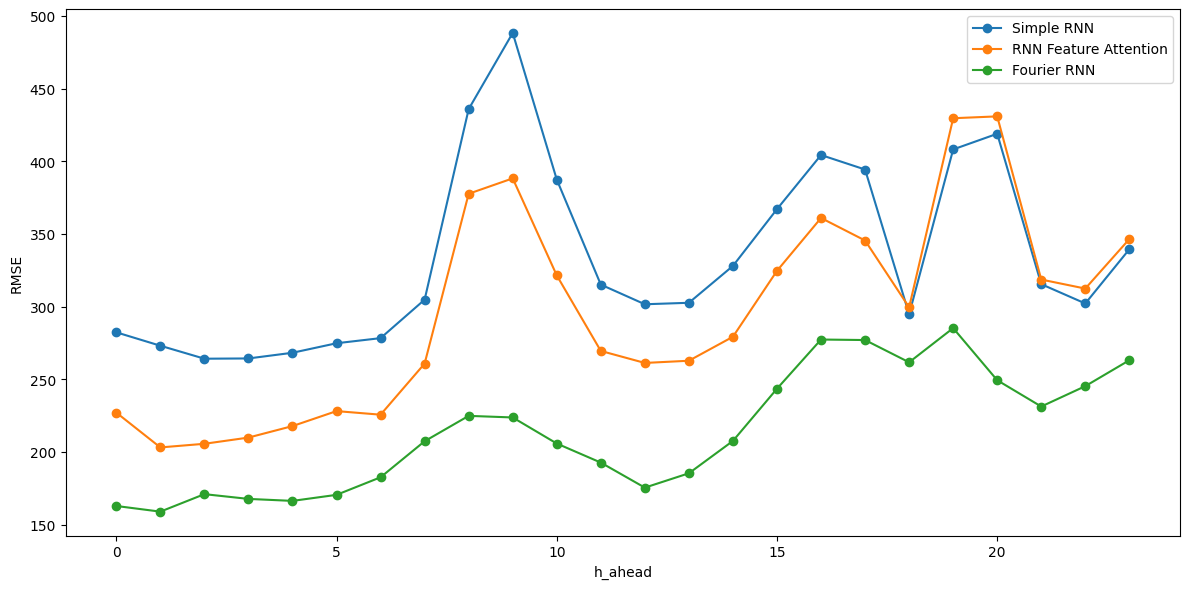

In [6]:

plt.figure(figsize=(12, 6))
plt.plot(rmse_rnn3['hour'], rmse_rnn3['RMSE_yhat'], label='Simple RNN', marker='o')
plt.plot(rmse_rnn4['hour'], rmse_rnn4['RMSE_yhat'], label='RNN Feature Attention', marker='o')
plt.plot(rmse_rnn5['hour'], rmse_rnn5['RMSE_yhat'], label='Fourier RNN', marker='o')
plt.xlabel('h_ahead')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.savefig('experiment_results/' + out_dir + '/rmse_rnn_comed.png')
plt.show()

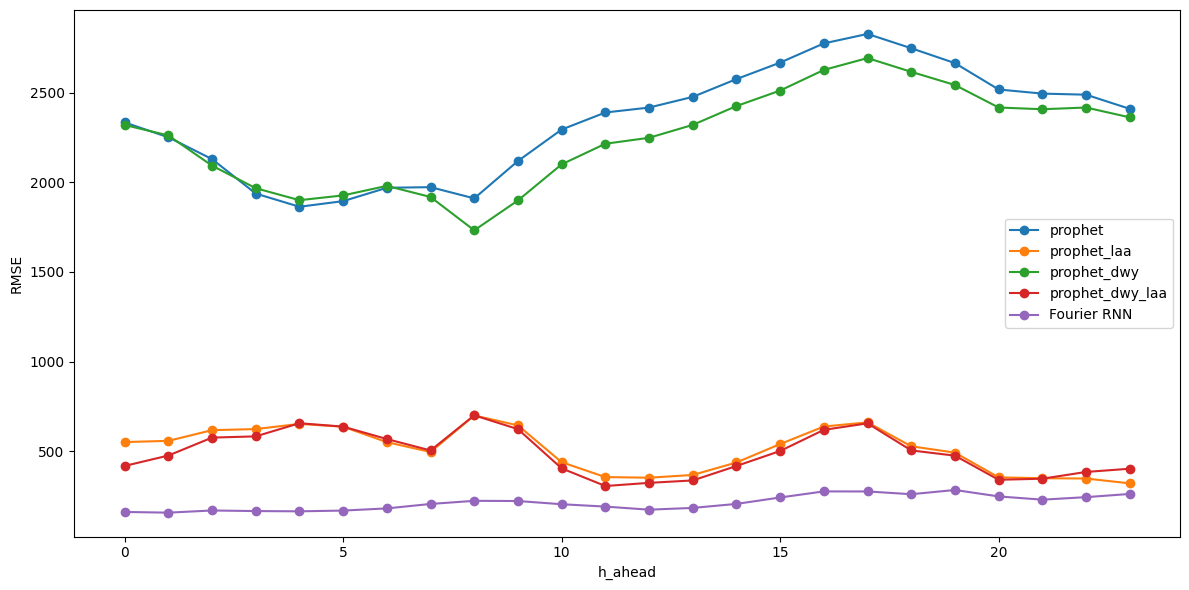

In [8]:

plt.figure(figsize=(12, 6))
plt.plot(rmse_rnn1['hour'], rmse_rnn1['RMSE_yhat'], label='prophet', marker='o')
plt.plot(rmse_rnn1['hour'], rmse_rnn1['RMSE_adjusted_y'], label='prophet_laa', marker='o')
plt.plot(rmse_rnn2['hour'], rmse_rnn2['RMSE_yhat'], label='prophet_dwy', marker='o')
plt.plot(rmse_rnn2['hour'], rmse_rnn2['RMSE_adjusted_y'], label='prophet_dwy_laa', marker='o')
plt.plot(rmse_rnn5['hour'], rmse_rnn5['RMSE_yhat'], label='Fourier RNN', marker='o')
plt.xlabel('h_ahead')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.savefig('experiment_results/' + out_dir + '/rmse_prophet_comed.png')
plt.show()

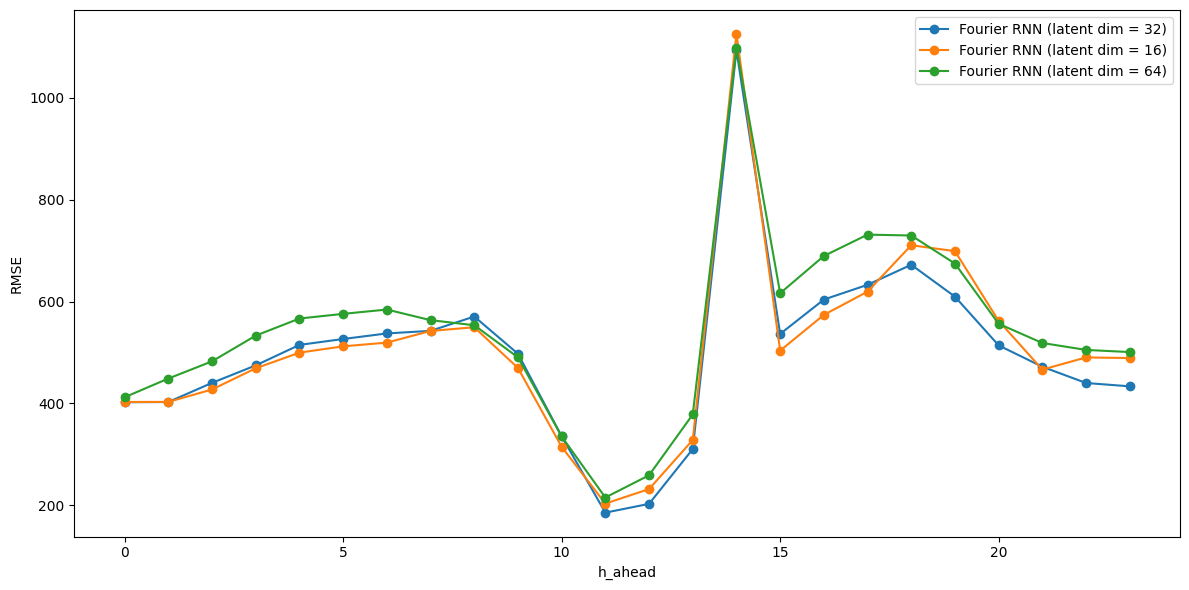

In [22]:

plt.figure(figsize=(12, 6))
plt.plot(rmse_rnn5['hour'], rmse_rnn5['RMSE_yhat'], label='Fourier RNN (latent dim = 32)', marker='o')
plt.plot(rmse_rnn6['hour'], rmse_rnn6['RMSE_yhat'], label='Fourier RNN (latent dim = 16)', marker='o')
plt.plot(rmse_rnn7['hour'], rmse_rnn7['RMSE_yhat'], label='Fourier RNN (latent dim = 64)', marker='o')
plt.xlabel('h_ahead')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.savefig('experiment_results/' + out_dir + '/rmse_latent_comed.png')
plt.show()

## Dayton Result

In [9]:
out_dir = 'Dayton_results'

In [10]:
result1 = pd.read_csv('experiment_results/' + out_dir + '/results_prophet.csv')
rmse_rnn1 = rmse_function_prophet(result1)

result2 = pd.read_csv('experiment_results/' + out_dir + '/results_prophet_dwy.csv')
rmse_rnn2 = rmse_function_prophet(result2)

result3 = pd.read_csv('experiment_results/' + out_dir + '/results_simple.csv')
rmse_rnn3 = rmse_function_rnn(result3)

result4 = pd.read_csv('experiment_results/' + out_dir + '/results_attention.csv')
rmse_rnn4 = rmse_function_rnn(result4)

result5 = pd.read_csv('experiment_results/' + out_dir + '/results_fourier.csv')
rmse_rnn5 = rmse_function_rnn(result5)

result6 = pd.read_csv('experiment_results/' + out_dir + '/results_fourier_dim16.csv')
rmse_rnn6 = rmse_function_rnn(result6)

result7 = pd.read_csv('experiment_results/' + out_dir + '/results_fourier_dim64.csv')
rmse_rnn7 = rmse_function_rnn(result7)

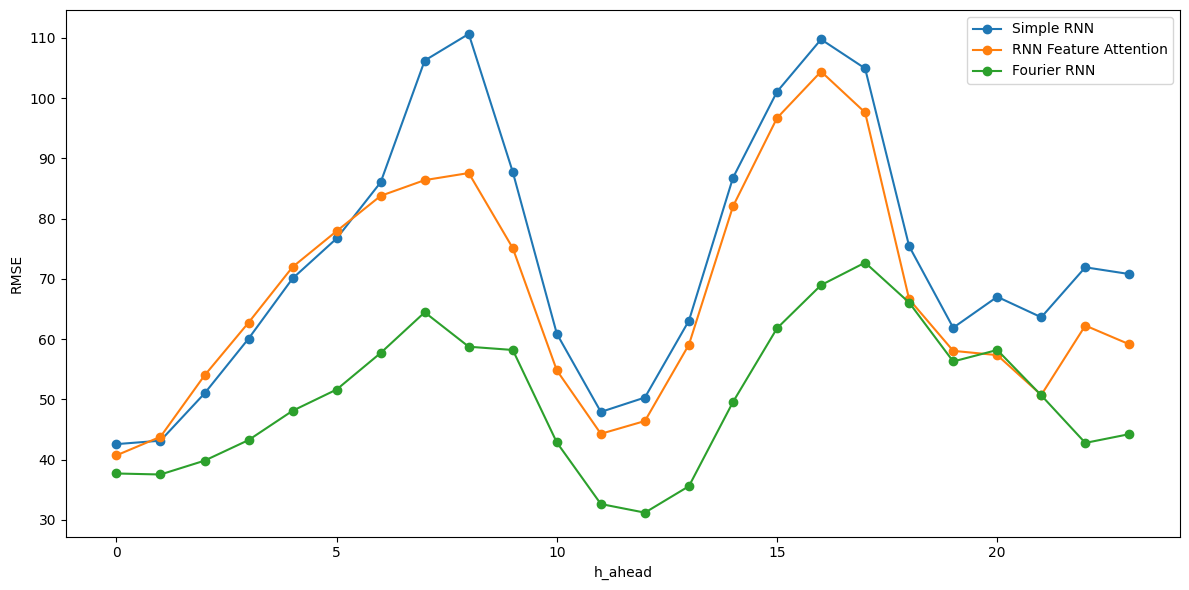

In [11]:

plt.figure(figsize=(12, 6))
plt.plot(rmse_rnn3['hour'], rmse_rnn3['RMSE_yhat'], label='Simple RNN', marker='o')
plt.plot(rmse_rnn4['hour'], rmse_rnn4['RMSE_yhat'], label='RNN Feature Attention', marker='o')
plt.plot(rmse_rnn5['hour'], rmse_rnn5['RMSE_yhat'], label='Fourier RNN', marker='o')
plt.xlabel('h_ahead')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.savefig('experiment_results/' + out_dir + '/rmse_rnn_dayton.png')
plt.show()

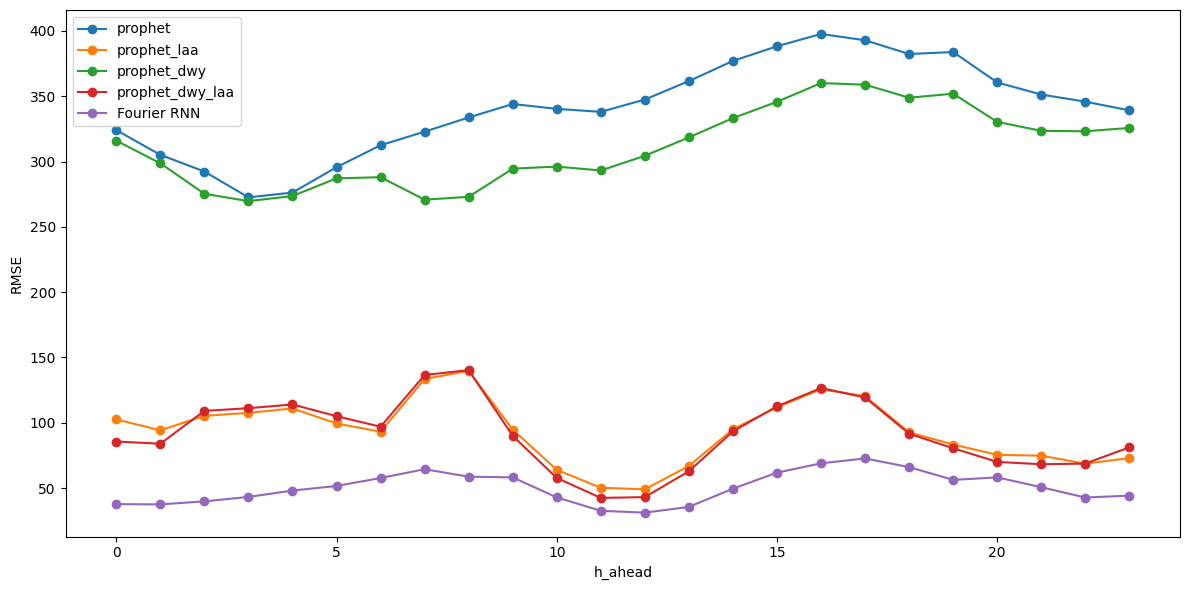

In [12]:

plt.figure(figsize=(12, 6))
plt.plot(rmse_rnn1['hour'], rmse_rnn1['RMSE_yhat'], label='prophet', marker='o')
plt.plot(rmse_rnn1['hour'], rmse_rnn1['RMSE_adjusted_y'], label='prophet_laa', marker='o')
plt.plot(rmse_rnn2['hour'], rmse_rnn2['RMSE_yhat'], label='prophet_dwy', marker='o')
plt.plot(rmse_rnn2['hour'], rmse_rnn2['RMSE_adjusted_y'], label='prophet_dwy_laa', marker='o')
plt.plot(rmse_rnn5['hour'], rmse_rnn5['RMSE_yhat'], label='Fourier RNN', marker='o')
plt.xlabel('h_ahead')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.savefig('experiment_results/' + out_dir + '/rmse_prophet_dayton.png')
plt.show()

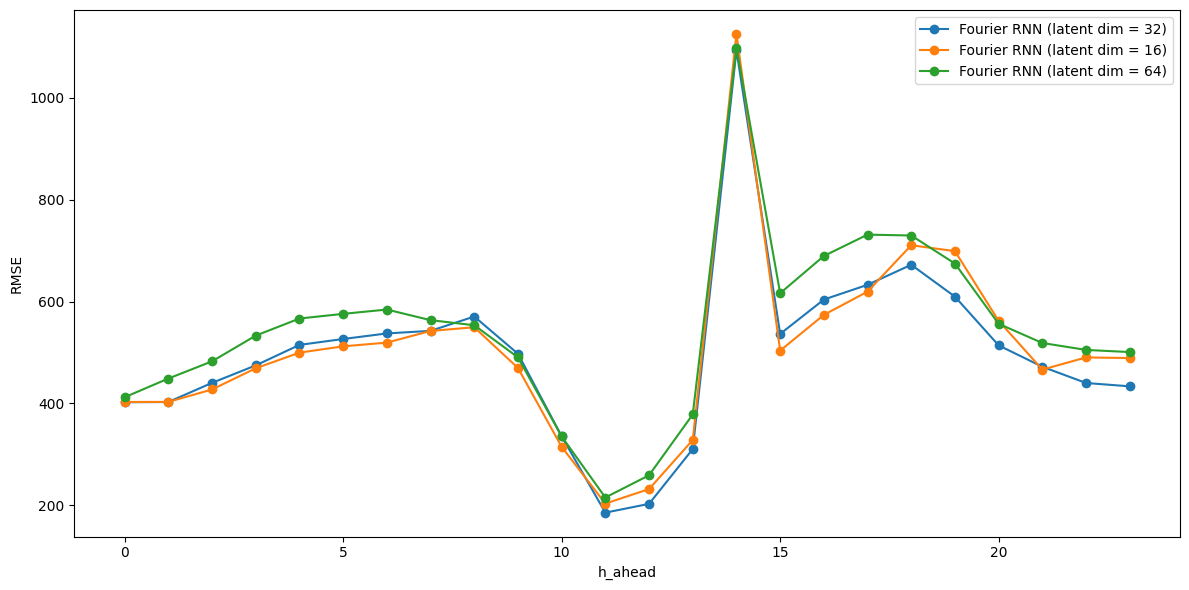

In [23]:

plt.figure(figsize=(12, 6))
plt.plot(rmse_rnn5['hour'], rmse_rnn5['RMSE_yhat'], label='Fourier RNN (latent dim = 32)', marker='o')
plt.plot(rmse_rnn6['hour'], rmse_rnn6['RMSE_yhat'], label='Fourier RNN (latent dim = 16)', marker='o')
plt.plot(rmse_rnn7['hour'], rmse_rnn7['RMSE_yhat'], label='Fourier RNN (latent dim = 64)', marker='o')
plt.xlabel('h_ahead')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.savefig('experiment_results/' + out_dir + '/rmse_latent_dayton.png')
plt.show()

## Deok Result

In [13]:
out_dir = 'Deok_results'

In [14]:
result1 = pd.read_csv('experiment_results/' + out_dir + '/results_prophet.csv')
rmse_rnn1 = rmse_function_prophet(result1)

result2 = pd.read_csv('experiment_results/' + out_dir + '/results_prophet_dwy.csv')
rmse_rnn2 = rmse_function_prophet(result2)

result3 = pd.read_csv('experiment_results/' + out_dir + '/results_simple.csv')
rmse_rnn3 = rmse_function_rnn(result3)

result4 = pd.read_csv('experiment_results/' + out_dir + '/results_attention.csv')
rmse_rnn4 = rmse_function_rnn(result4)

result5 = pd.read_csv('experiment_results/' + out_dir + '/results_fourier.csv')
rmse_rnn5 = rmse_function_rnn(result5)

result6 = pd.read_csv('experiment_results/' + out_dir + '/results_fourier_dim16.csv')
rmse_rnn6 = rmse_function_rnn(result6)

result7 = pd.read_csv('experiment_results/' + out_dir + '/results_fourier_dim64.csv')
rmse_rnn7 = rmse_function_rnn(result7)

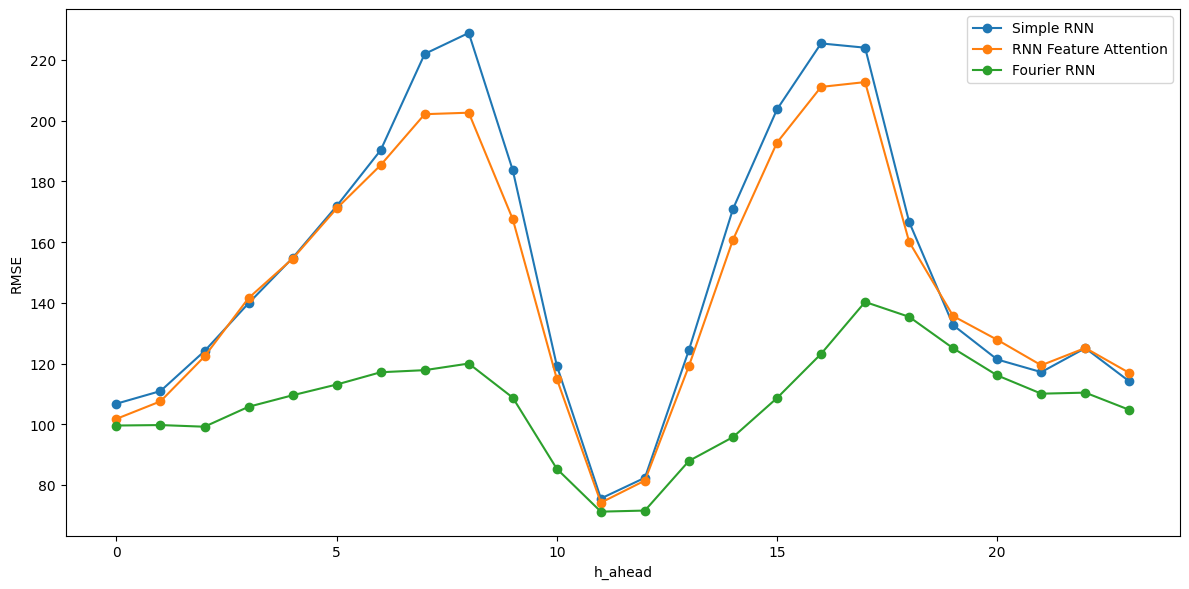

In [15]:

plt.figure(figsize=(12, 6))
plt.plot(rmse_rnn3['hour'], rmse_rnn3['RMSE_yhat'], label='Simple RNN', marker='o')
plt.plot(rmse_rnn4['hour'], rmse_rnn4['RMSE_yhat'], label='RNN Feature Attention', marker='o')
plt.plot(rmse_rnn5['hour'], rmse_rnn5['RMSE_yhat'], label='Fourier RNN', marker='o')
plt.xlabel('h_ahead')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.savefig('experiment_results/' + out_dir + '/rmse_rnn_deok.png')
plt.show()

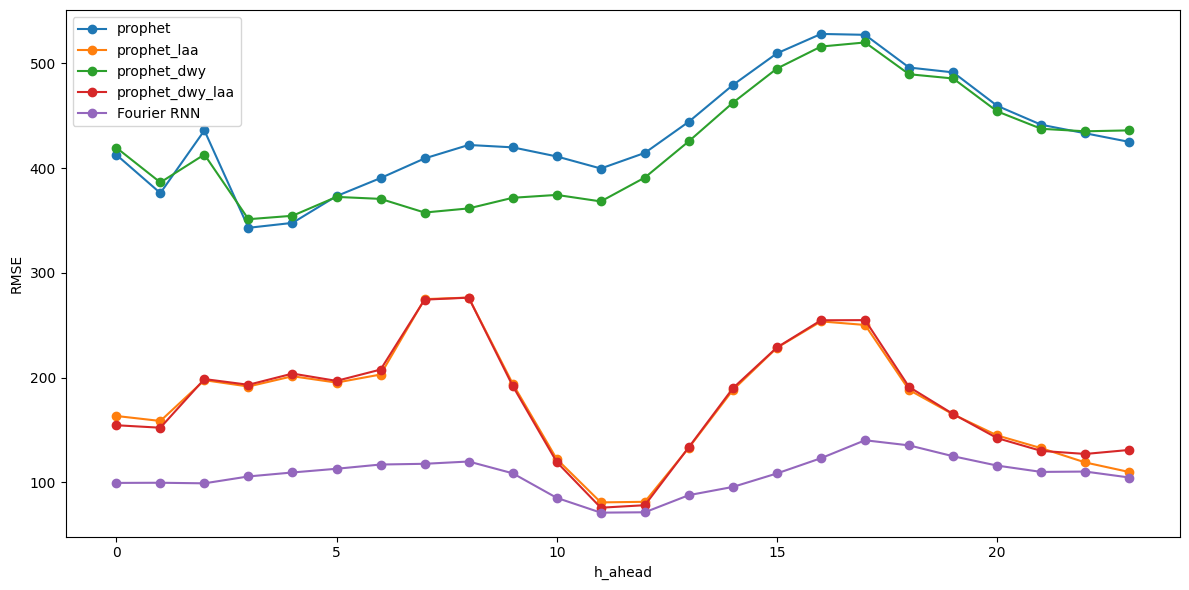

In [16]:

plt.figure(figsize=(12, 6))
plt.plot(rmse_rnn1['hour'], rmse_rnn1['RMSE_yhat'], label='prophet', marker='o')
plt.plot(rmse_rnn1['hour'], rmse_rnn1['RMSE_adjusted_y'], label='prophet_laa', marker='o')
plt.plot(rmse_rnn2['hour'], rmse_rnn2['RMSE_yhat'], label='prophet_dwy', marker='o')
plt.plot(rmse_rnn2['hour'], rmse_rnn2['RMSE_adjusted_y'], label='prophet_dwy_laa', marker='o')
plt.plot(rmse_rnn5['hour'], rmse_rnn5['RMSE_yhat'], label='Fourier RNN', marker='o')
plt.xlabel('h_ahead')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.savefig('experiment_results/' + out_dir + '/rmse_prophet_deok.png')
plt.show()

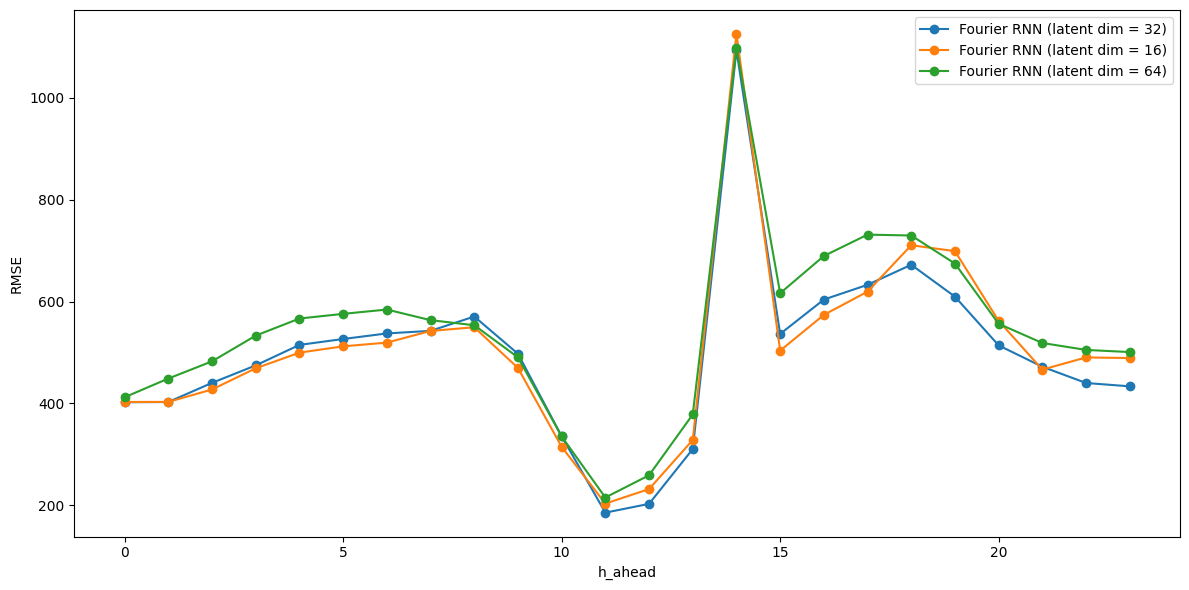

In [24]:

plt.figure(figsize=(12, 6))
plt.plot(rmse_rnn5['hour'], rmse_rnn5['RMSE_yhat'], label='Fourier RNN (latent dim = 32)', marker='o')
plt.plot(rmse_rnn6['hour'], rmse_rnn6['RMSE_yhat'], label='Fourier RNN (latent dim = 16)', marker='o')
plt.plot(rmse_rnn7['hour'], rmse_rnn7['RMSE_yhat'], label='Fourier RNN (latent dim = 64)', marker='o')
plt.xlabel('h_ahead')
plt.ylabel('RMSE')
plt.legend()
plt.tight_layout()
plt.savefig('experiment_results/' + out_dir + '/rmse_latent_deok.png')
plt.show()